In [ ]:
!pip install requests
!pip install bs4
!pip install nltk
!pip install wordcloud
!pip install textblob

# runner

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
# import module
import requests
from bs4 import BeautifulSoup

HEADERS = ({'User-Agent':
			'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
			AppleWebKit/537.36 (KHTML, like Gecko) \
			Chrome/90.0.4430.212 Safari/537.36',
			'Accept-Language': 'en-US, en;q=0.5'})

# user define function
# Scrape the data
def getdata(url):
	r = requests.get(url, headers=HEADERS)
	return r.text


def html_code(url):

	# pass the url
	# into getdata function
	htmldata = getdata(url)
	soup = BeautifulSoup(htmldata, 'html.parser')

	# display html code
	return (soup)


url1 = str(input("please give the url here : "))
url=url1
soup = html_code(url)



please give the url here : https://www.amazon.in/Test-Exclusive_2020_1159-Multi-3GB-Storage/product-reviews/B089MVC43X/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews


In [ ]:

def cus_data(soup):
    # find the Html tag
    # with find()
    # and convert into string
    data_str = ""
    cus_list = []
  
    for item in soup.find_all("span", class_="a-profile-name"):
        data_str = data_str + item.get_text()
        cus_list.append(data_str)
        data_str = ""
    return cus_list
  
  


In [ ]:
def cus_rev(soup):
	# find the Html tag
	# with find()
	# and convert into string
	data_str = ""

	for item in soup.find_all("span", class_="a-size-base review-text review-text-content"):
		data_str = data_str + item.get_text()

	result = data_str.split("\n")
	return (result)




In [ ]:
cus_res=[]
rev_result=[]

In [ ]:
rev_results=[]
cus_ress=[]
nop=int(input('please give the number of review pages you want to analyze'))
for i in range (nop):
  if soup.find_all("li", class_="a-last"): 
    url1=url+"&pageNumber="+str(i+1)
    print(url)
    soup = html_code(url1)
    cus_res = cus_data(soup)[2:]
    cus_ress=cus_ress+cus_res
    rev_results=rev_results+rev_result
    print(cus_res)
    rev_data = cus_rev(soup)
    rev_result = []
    for i in rev_data:
      if i is "":
        pass
      else:
        rev_result.append(i)
    print(rev_result)
  else:
    pass





please give the number of review pages you want to analyze10
https://www.amazon.in/Test-Exclusive_2020_1159-Multi-3GB-Storage/product-reviews/B089MVC43X/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
['Akash Porwal ', 'YENNI SATYANARAYANA', 'Murugeshan Thevar', 'rahul', 'JDas', 'Mahesh', 'Sreenivasulu Balannagari', 'Leeyan B.', 'Ashish Sharma', 'karthik']
['  Camera quality is very poor, 108 MP camera 📷 is working as 6 MP, very poor camera quality 😡😡😡😡😡😡🥺', '  Not upto the mark, compared to pro max only pro is better to buy. For 20000/-  it is not valuable. For super amoled display I give only 5/10, for back camera 7/10,front camera 6/7, battery performance 7//10. Finally better to buy another campany Mobile to that price.', "  The phone is really great, I had purchased it in the first flash sale just looking the specifications & reviews from the Tech Bloggers.. Since i am also a food blogger i wanted a phone with a good camera ..Redmi Note 10 Pro Max is pretty good in te

In [ ]:
x=list(set(cus_ress))
y=list(set(rev_results))

In [ ]:
if len(y)>len(x):
  dif=len(y)-len(x)
  y=y[dif:]
  print('process complete....')
elif len(x)>len(y):
  dif=len(x)-len(y)
  x=x[dif:]
  print('process complete...')
else:
  print('Done')

process complete...


In [ ]:
len(x),len(y)

(92, 92)

In [ ]:
import pandas as pd
  
# initialise data of lists.
data = {'Name': x,
        'review': y}
  
# Create DataFrame
data= pd.DataFrame(data)
  
# Save the output.
data

,Name,review
0,Aditya Priyanshu,Design is very good
1,Ashish Sharma,automatic call recorder option not available...
2,Sanjay kumar,Buying a phone these days have become a mamm...
3,Amazon Customer,Reweing after 1 Week of usePros• Vibrant Scr...
4,Sreenivasulu Balannagari,"Camera quality is very poor, 108 MP camera 📷..."
...,...,...
87,Eugenia,Switched to android after many years of IOS ...
88,durga prasad,After using 5 Days here are my experiences w...
89,apurva arora,Amazon delivery good in 48 hrs...This is my...
90,Rakesh w.,The media could not be loa...


In [ ]:

sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["review"]]
data["Neutral"] = [sentiments.polarity_scores(i)['neu'] for i in data["review"]]


In [ ]:
from textblob import TextBlob
data["polarity"]=[TextBlob(i).sentiment[0] for i in data["review"]]
data["subjectivity"]=[TextBlob(i).sentiment[0] for i in data["review"]]

In [ ]:
data

,Name,review,Positive,Negative,Neutral,polarity,subjectivity
0,Aditya Priyanshu,Design is very good,0.516,0.000,0.484,0.910000,0.910000
1,Ashish Sharma,automatic call recorder option not available...,0.189,0.000,0.811,0.285714,0.285714
2,Sanjay kumar,Buying a phone these days have become a mamm...,0.077,0.024,0.899,0.164389,0.164389
3,Amazon Customer,Reweing after 1 Week of usePros• Vibrant Scr...,0.187,0.033,0.780,0.161685,0.161685
4,Sreenivasulu Balannagari,"Camera quality is very poor, 108 MP camera 📷...",0.000,0.311,0.689,-0.520000,-0.520000
...,...,...,...,...,...,...,...
87,Eugenia,Switched to android after many years of IOS ...,0.263,0.035,0.702,0.305556,0.305556
88,durga prasad,After using 5 Days here are my experiences w...,0.114,0.000,0.886,0.500000,0.500000
89,apurva arora,Amazon delivery good in 48 hrs...This is my...,0.178,0.000,0.822,0.422222,0.422222
90,Rakesh w.,The media could not be loa...,0.000,0.000,1.000,0.000000,0.000000


In [ ]:
M = sum(data["Positive"])
N = sum(data["Negative"])


def sentiment_score(a, b):
    if (a>b):
        print("Positive 😊 ")
    else:
        print("Negative 😠 ")
sentiment_score(M, N)

Positive 😊 


In [ ]:
print("Positive: ", M)
print("Negative: ", N)

Positive:  12.537999999999998
Negative:  8.343


<BarContainer object of 2 artists>

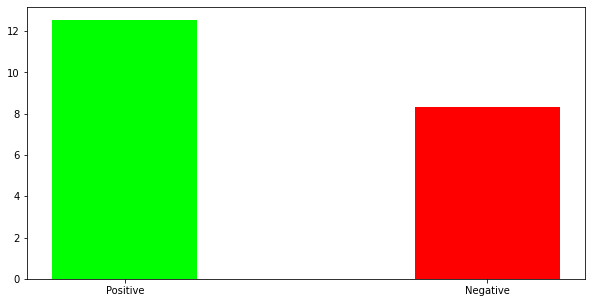

In [ ]:
import matplotlib.pyplot as plt

score = {"Positive": M,"Negative":N}
courses = list(score.keys())
values = list(score.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color =['lime','red'],
        width = 0.4)

There are 44894 words in all the messages.


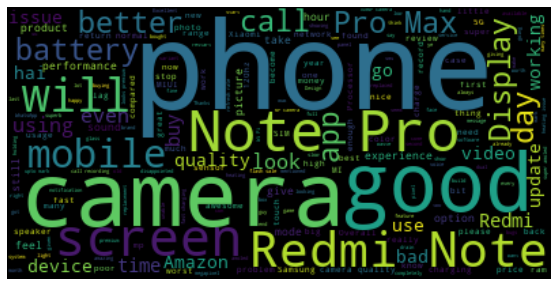

In [ ]:
text = " ".join(review for review in data.review)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
feature=str(input('Look here for the feature you want the review about : ')).lower()
a=data[data['review'].str.contains(feature)]
a

Look here for the feature you want the review about : camera


,Name,review,Positive,Negative,Neutral,polarity,subjectivity
2,Sanjay kumar,Buying a phone these days have become a mamm...,0.077,0.024,0.899,0.164389,0.164389
3,Amazon Customer,Reweing after 1 Week of usePros• Vibrant Scr...,0.187,0.033,0.780,0.161685,0.161685
4,Sreenivasulu Balannagari,"Camera quality is very poor, 108 MP camera 📷...",0.000,0.311,0.689,-0.520000,-0.520000
7,Manish Patidar,After 10 days of usage I am writing the revi...,0.142,0.056,0.803,0.310521,0.310521
8,Siva,If you are buying for camera. Don't go for i...,0.000,0.000,1.000,-0.150000,-0.150000
10,Siddharth Singh,The camera claimed 108 mega pixel is the wor...,0.000,0.301,0.699,-0.666667,-0.666667
13,Shailendra,Part 1 Review: Have been using Redmi Note 5 ...,0.134,0.070,0.796,0.139653,0.139653
16,sujith kumar,Camera quality not as 108 mp. Redmi note 6 c...,0.182,0.000,0.818,0.400000,0.400000
17,Salim Sema,The camera needs to improve via software upd...,0.371,0.000,0.629,0.910000,0.910000
18,Manav J.,Worst camera ever on note series camera like...,0.293,0.169,0.537,-0.266667,-0.266667


In [ ]:
usrinp=int(input('Do you want to see a perticular review just type the index number here : '))
a.review[usrinp]

Do you want to see a perticular review just type the index number here : 10


"  The camera claimed 108 mega pixel is the worst thing about the phone. Haven't saw such a worst camera after charging 20k."